In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

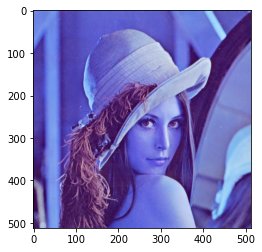

In [2]:
image = cv.imread("Lena.jfif") #bgr
plt.imshow(image)

In [5]:
# BGR to RGB
image_1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#BGR to Gray
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

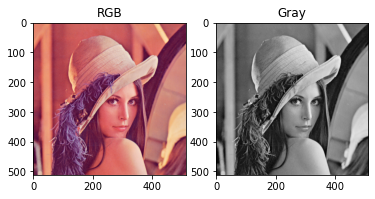

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("RGB")
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap= "gray")
plt.title("Gray")
plt.show()

135.0


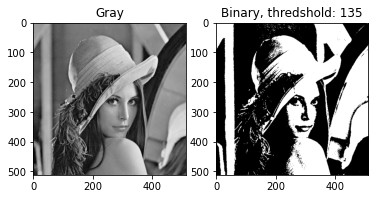

In [10]:
ret, image_binary = cv.threshold(image_gray, 135, 255, cv.THRESH_BINARY)
print(ret)

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap = "gray")
plt.title("Gray")
plt.subplot(1, 2, 2)
plt.imshow(image_binary, cmap= "gray")
plt.title("Binary, thredshold: 135")
plt.show()

In [11]:
np_gray = np.asarray(image_gray)
np_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [33]:
def filtting(R, G, B):
    row, col = R.shape
    out_img = np.zeros(R.shape, np.uint8)
    for i in range(row):
        for j in range(col):
            if (R[i,j] == G[i,j] == B[i,j] == 255):
                out_img[i,j] = 1
    return out_img

def rgb2binary(in_img, threshold:list, is_BGR=False):
    if is_BGR == False:
        in_img = cv.cvtColor(in_img, cv.COLOR_RGB2BGR)
    
    B, G, R = cv.split(in_img)
    _, R = cv.threshold(R, threshold[0], 255, cv.THRESH_BINARY)
    _, G = cv.threshold(G, threshold[1], 255, cv.THRESH_BINARY)
    _, B = cv.threshold(B, threshold[2], 255, cv.THRESH_BINARY)
    
    out_img = filtting(R, G, B)
    return out_img

In [34]:
i_binary = rgb2binary(image_1, [200, 100, 100])

Text(0.5, 1.0, 'Threshold for R, G, B: 100, 200, 100')

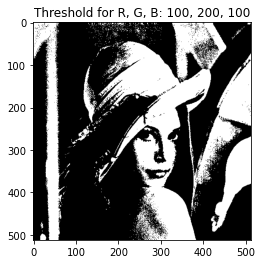

In [35]:
plt.imshow(i_binary, cmap="gray")
plt.title("Threshold for R, G, B: 100, 200, 100")

In [39]:
def gray_hist(image):
    plt.hist(image.ravel(), 256, [0, 256])

def RGB_hist(image):
    color = ("blue", "green", "red")
    for i, color in enumerate(color):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()

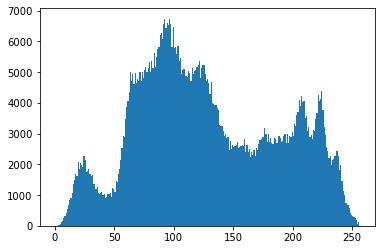

In [40]:
gray_hist(image)

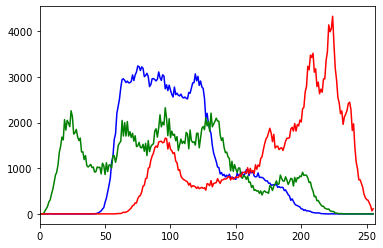

In [41]:
RGB_hist(image)

In [42]:
def equal_hist(image):
    dst = cv.equalizeHist(image)
    plt.imshow(dst, cmap="gray")

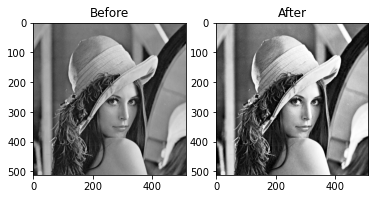

In [44]:
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap = "gray")
plt.title("Before")
plt.subplot(1, 2, 2)
equal_hist(image_gray)
plt.title("After")
plt.show()

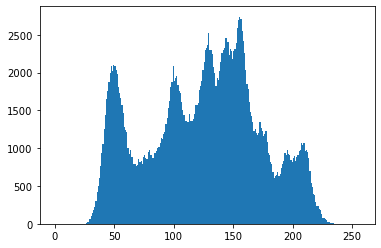

In [45]:
gray_hist(image_gray)

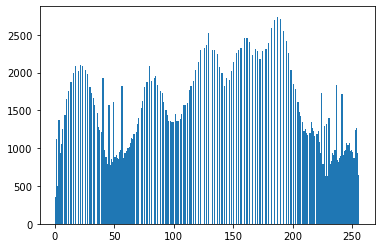

In [47]:
gray_hist(cv.equalizeHist(image_gray))

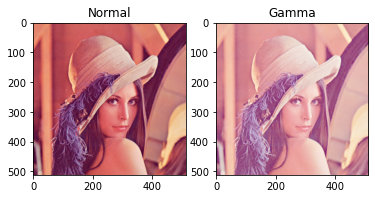

In [48]:
img = cv.imread("Lena.jfif")
img_1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_norm = img_1 / 255.
img_gamma = np.power(img_norm, 0.5) * 255.
img_gamma = img_gamma.astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(img_norm)
plt.title("Normal")
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.title("Gamma")
plt.show()

In [57]:
def gauss_noise(image, mean=0, var=0.001):
    image = np.array(image/255, dtype = float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    output = image + noise
    
    if output.min()<0:
        low_clip = -1.
    else:
        low_clip = 0
    output = np.clip(output, low_clip, 1.)
    output = np.uint8(output * 255)
    return output

Text(0.5, 1.0, 'Gaussian noise')

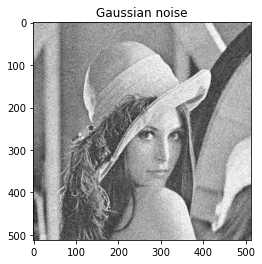

In [59]:
gaussian_img = gauss_noise(image_gray, 0.1, 0.01)
plt.imshow(gaussian_img, cmap="gray")
plt.title("Gaussian noise")

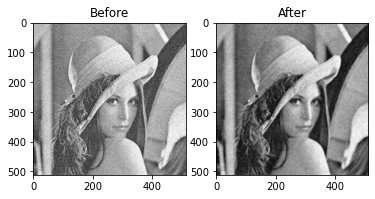

In [63]:
gaussian_blur = cv.GaussianBlur(gaussian_img, (7,7), 0)

plt.subplot(1, 2, 1)
plt.imshow(gaussian_img, cmap="gray")
plt.title("Before")
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur, cmap="gray")
plt.title("After")
plt.show()

Text(0.5, 1.0, 'noise img')

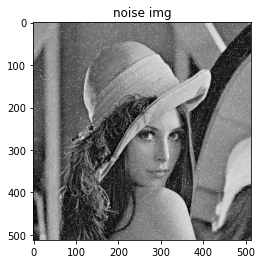

In [66]:
med_img = image_gray
for i in range(5000):
    temp_x = np.random.randint(0, med_img.shape[0])
    temp_y = np.random.randint(0, med_img.shape[1])
    med_img[temp_x][temp_y] = 255
plt.imshow(med_img, cmap="gray")
plt.title("noise img")

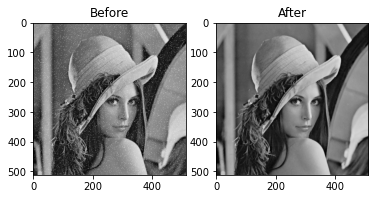

In [67]:
med_blur = cv.medianBlur(med_img,3)

plt.subplot(1, 2, 1)
plt.imshow(med_img, cmap="gray")
plt.title("Before")
plt.subplot(1, 2, 2)
plt.imshow(med_blur, cmap="gray")
plt.title("After")
plt.show()

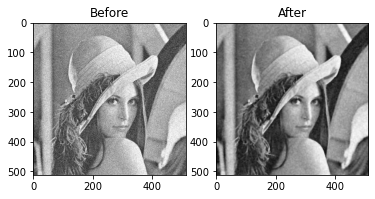

In [68]:
bilateral_blur = cv.bilateralFilter(gaussian_img,7,75,75)

plt.subplot(1, 2, 1)
plt.imshow(gaussian_img, cmap="gray")
plt.title("Before")
plt.subplot(1, 2, 2)
plt.imshow(bilateral_blur, cmap="gray")
plt.title("After")
plt.show()

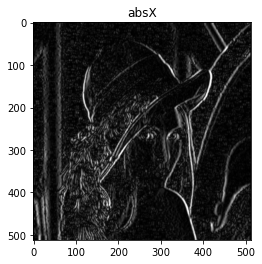

In [69]:
img_sobel = cv.GaussianBlur(image_gray, (7,7), 0)
x = cv.Sobel(img_sobel, cv.CV_16S, 1, 0)
y = cv.Sobel(img_sobel, cv.CV_16S, 0, 1)

absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)

dst = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.imshow(absX, cmap="gray")
plt.title('absX')
plt.show()

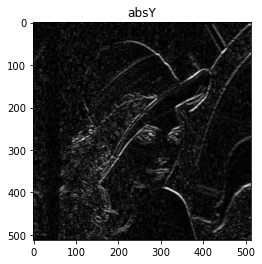

In [70]:
plt.imshow(absY, cmap="gray")
plt.title('absY')
plt.show()

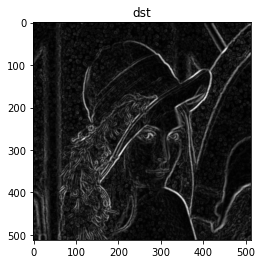

In [71]:
plt.imshow(dst, cmap="gray")
plt.title('dst')
plt.show()

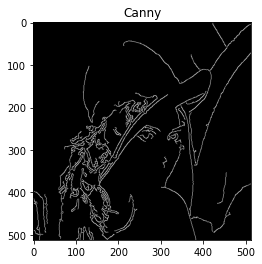

In [74]:
img_Canny = cv.GaussianBlur(image_gray, (7,7), 0)
img_Canny = cv.Canny(img_Canny, 50, 190)

plt.imshow(img_Canny, cmap="gray")
plt.title('Canny')
plt.show()